### SVM Introduction

Support Vector Machines (SVMs) are machine learning models primarily used for classification tasks. They excel in finding optimal decision boundaries by identifying the hyperplane that maximizes the margin, the distance between the hyperplane and the nearest data points from different classes. This search for an optimal boundary makes SVMs robust and effective in handling complex data distributions. They leverage kernel functions to map data into higher dimensions, allowing them to solve nonlinear classification problems. SVMs offer versatility in handling various kernel functions like linear, polynomial, or radial basis functions, enabling them to work well in high-dimensional spaces. However, parameter tuning and choosing the right kernel can be challenging, and SVMs may be computationally intensive for large datasets.

In summary, SVMs are powerful tools for classification due to their ability to construct effective decision boundaries. Their capacity to handle high-dimensional data and nonlinear problems makes them valuable, although their effectiveness depends on careful parameter selection and can pose computational challenges with extensive datasets.

### Imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### About Cancer Data
Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepositor...] 

Public Source - https://s3-api.us-geo.objectstorage.s...

In [55]:
### Data Augmentation`

In [45]:
import pandas as pd

data = pd.read_csv('cell_samples.csv')

# Duplicate rows in the CSV file (example: duplicating each row 3 times)
augmented_data = pd.concat([data] * 3, ignore_index=True)

augmented_data.to_csv('augmented_cell_samples.csv', index=False)


### Load data from CSV file

In [46]:
cell_df=pd.read_csv('augmented_cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

Class
2    1374
4     723
Name: count, dtype: int64

### Distribution of Classes

<Axes: xlabel='Clump', ylabel='UnifSize'>

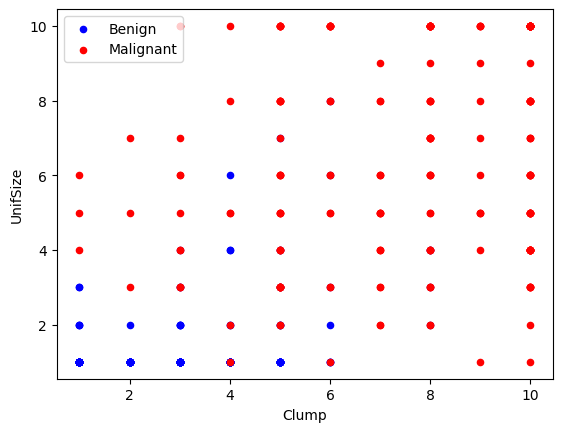

In [47]:
malignant_df=cell_df[cell_df['Class']==4][0:200]
benign_df=cell_df[cell_df['Class']==2][0:200]

axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue', label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red', label='Malignant',ax=axes)
#help(benign_df.plot())

### Identifying unwanted rows

In [48]:
cell_df.dtypes
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Remove unwanted columns|

In [49]:
cell_df.columns

feature_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#idependent var
x=np.asarray(feature_df)

#dependent var
y=np.array(cell_df['Class'])

x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

### Training and Testing

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

X_train.shape

y_train.shape

X_test.shape

y_test.shape

(410,)

### Modeling(SVM with Scikit-learn)

In [51]:
from sklearn import svm

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train, y_train)

y_predict=classifier.predict(X_test)

### Evaluation results

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.99      0.96      0.97       282
           4       0.93      0.97      0.95       128

    accuracy                           0.97       410
   macro avg       0.96      0.97      0.96       410
weighted avg       0.97      0.97      0.97       410



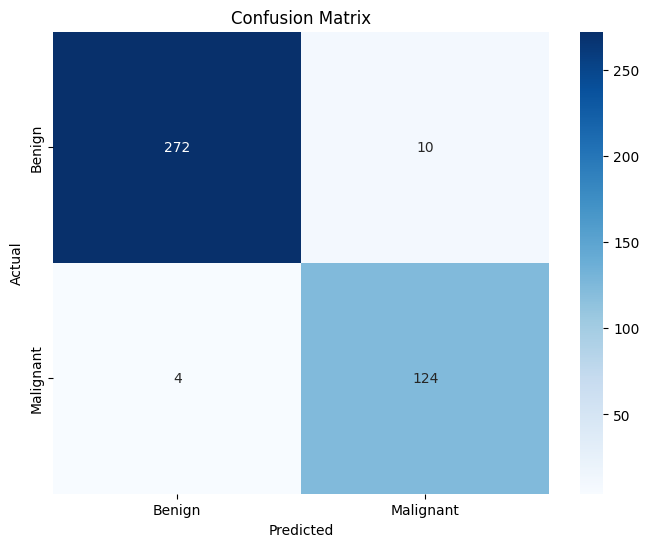

In [53]:
import numpy as np
class_labels = {2: 'Benign', 4: 'Malignant'}

y_test_labels = np.vectorize(class_labels.get)(y_test)
y_predict_labels = np.vectorize(class_labels.get)(y_predict)

conf_matrix = confusion_matrix(y_test_labels, y_predict_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=[class_labels[label] for label in classifier.classes_], 
            yticklabels=[class_labels[label] for label in classifier.classes_])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()